In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, log_loss
%matplotlib inline

### Loading Dataset

In [2]:
bankchurn = pd.read_csv("BankChurners.csv")
bankchurn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Dataset Overview

In [3]:
bankchurn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [4]:
bankchurn_overview = pd.DataFrame(bankchurn.dtypes, columns = ["data_type"])
bankchurn_overview["count"] = bankchurn.count()
bankchurn_overview["null_value"] = bankchurn.isnull().sum()
bankchurn_overview["min"] = bankchurn.min()
bankchurn_overview["max"] = bankchurn.max()
bankchurn_overview
# Using a new table to see the details in greater clarity

,data_type,count,null_value,min,max
CLIENTNUM,int64,10127,0,708082083,828343083
Attrition_Flag,object,10127,0,Attrited Customer,Existing Customer
Customer_Age,int64,10127,0,26,73
Gender,object,10127,0,F,M
Dependent_count,int64,10127,0,0,5
Education_Level,object,10127,0,College,Unknown
Marital_Status,object,10127,0,Divorced,Unknown
Income_Category,object,10127,0,$120K +,Unknown
Card_Category,object,10127,0,Blue,Silver
Months_on_book,int64,10127,0,13,56


In [5]:
list(bankchurn)
# Double checking the columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

### Data Exploration

- Althrough there is no empty cells, it is noted that some cells are "Unknown"
- Education_level column have 1519 unknown which represents 15% of the data
- Marital_Status column have 749 unknown which represents 7.4% of the data
- Income Category column have 1112 unknown which represents 11% of the data
> The unknown values make up between 7.4% to 15% of the data in the column. After much considerations, I will treat unknown as a classification by itself as it may be overly generalise if I were to use the ”mode” in each category. Also, the customer probably intentionally leave out the information and it may also have impact on how genuine they are and how likely someone where to churn if they intentionally leave out certain information.  

- Imbalance class
> For the target data, 16.1% of the dataset is churned customer whereas 83.9% of the dataset is existing customer. I will explore resampling techniques, stratify and weight adjusting techniques.

- Selection of encoding
> To check some of the classification within the columns and decide the type of encoding to use

##### Education Level

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
15.0%


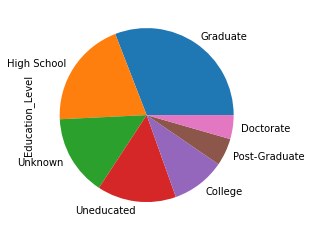

In [6]:
Education_Level_count = bankchurn.Education_Level.value_counts()
unknown_percentage = round(Education_Level_count["Unknown"]/sum(Education_Level_count) * 100, 1)

Education_Level_count.plot.pie()

print (Education_Level_count)
print (str(unknown_percentage) + '%')

<AxesSubplot:xlabel='Education Level', ylabel='% Attrition'>

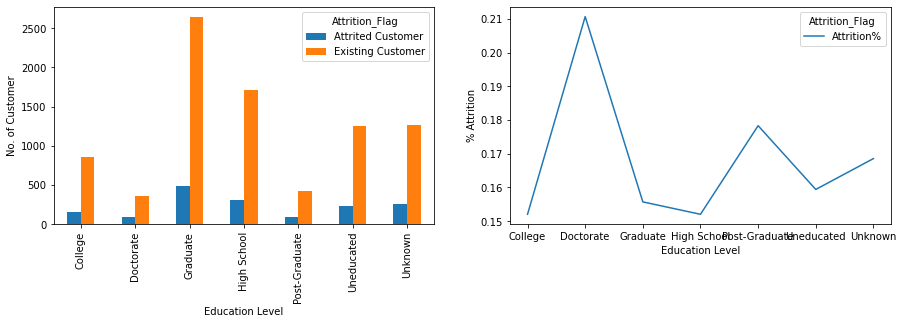

In [7]:
Education_Level_Attrition = bankchurn.groupby(["Attrition_Flag"])["Education_Level"].value_counts().unstack('Attrition_Flag')
Education_Level_Attrition['Attrition%'] = Education_Level_Attrition['Attrited Customer']/(Education_Level_Attrition['Existing Customer'] + Education_Level_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))
Education_Level_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Education Level", ylabel = "No. of Customer", ax=ax[0])
Education_Level_Attrition[['Attrition%']].plot(kind='line', xlabel = "Education Level", ylabel = "% Attrition", ax=ax[1])

Observation

1) The bank seems to have less customer with higher qualification (Post-Graduate, Doctorate)
<br>2) The attrition rate seem to be higher for the higher qualification (Post-Graduate, Doctorate), this could be due to the 
>(a) lower sample size or 
><br>(b) this credit card offering is not as attractive to these customer or 
><br>(c) these customer have more option (i.e better offerings from other banks/card)

<br>3) Unknown group seems to be a mixture of all the groups as the numbers seems like the average, hence it is a good decision to keep it separated 

##### Marital Status

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
7.4%


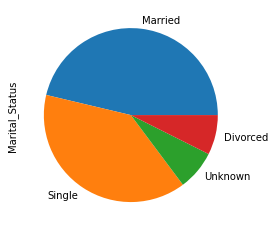

In [8]:
Marital_Status_count = bankchurn.Marital_Status.value_counts()
unknown_percentage = round(Marital_Status_count["Unknown"]/sum(Marital_Status_count) * 100, 1)

Marital_Status_count.plot.pie()

print (Marital_Status_count)
print (str(unknown_percentage) + '%')


<AxesSubplot:xlabel='Marital Status', ylabel='% Attrition'>

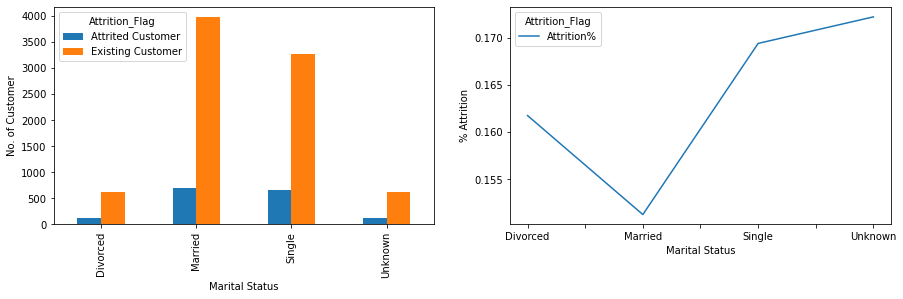

In [9]:
Marital_Status_Attrition = bankchurn.groupby(["Attrition_Flag"])["Marital_Status"].value_counts().unstack('Attrition_Flag')
Marital_Status_Attrition['Attrition%'] = Marital_Status_Attrition['Attrited Customer']/(Marital_Status_Attrition['Existing Customer'] + Marital_Status_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))
Marital_Status_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Marital Status", ylabel = "No. of Customer", ax=ax[0])
Marital_Status_Attrition[['Attrition%']].plot(kind='line', xlabel = "Marital Status", ylabel = "% Attrition", ax=ax[1])

Observation

<br> 1) Married customer seems to have out-performed the other category with both the higher count and yet the lower attrition rate. May consider to target these group of customers 
<br> 2) Unknown category seems to have under-performed as compared to other category . Althought it have approximately the same number as Divorced status, the attrition rate seems to be much higher
<br> 3) Singles category seems to have a high attrition rate too


##### Income Category

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
11.0%


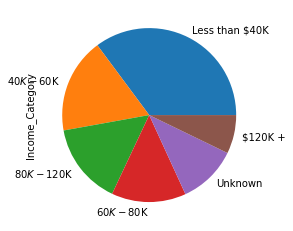

In [10]:
Income_Category_count = bankchurn.Income_Category.value_counts()
unknown_percentage = round(Income_Category_count["Unknown"]/sum(Income_Category_count) * 100, 1)

Income_Category_count.plot.pie()

print (Income_Category_count)
print (str(unknown_percentage) + '%')

<AxesSubplot:xlabel='Income Category', ylabel='% Attrition'>

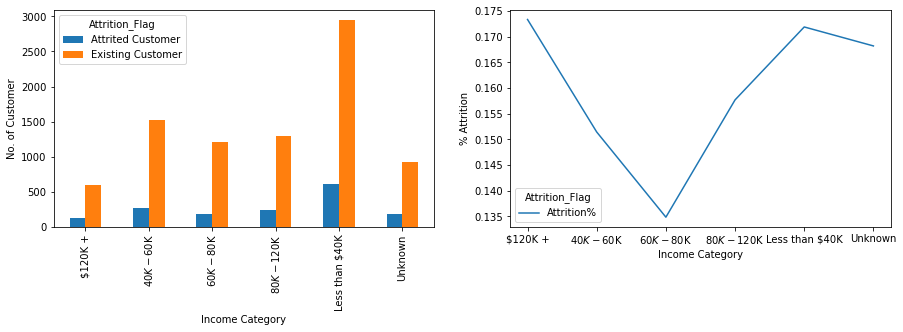

In [11]:
Income_Category_Attrition = bankchurn.groupby(["Attrition_Flag"])["Income_Category"].value_counts().unstack('Attrition_Flag')
Income_Category_Attrition['Attrition%'] = Income_Category_Attrition['Attrited Customer']/(Income_Category_Attrition['Existing Customer'] + Income_Category_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))
Income_Category_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Income Category", ylabel = "No. of Customer", ax=ax[0])
Income_Category_Attrition[['Attrition%']].plot(kind='line', xlabel = "Income Category", ylabel = "% Attrition", ax=ax[1])

Observation

<br> 1) The highest (>120k), lowest (<40k) and unknown income group seems to have the highest attrition rate. 
<br> 2) The middle class group seems to be the most loyal group of customers. This is also a trend supported by the Education Level if we were to equate higher education = higher income


#### Attrition Flag

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
16.1%


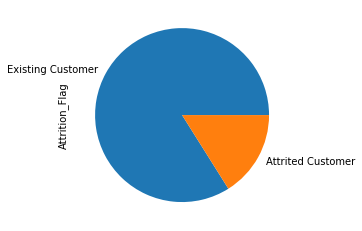

In [12]:
attrition_count = bankchurn.Attrition_Flag.value_counts()
attrition_percentage = round(attrition_count["Attrited Customer"]/sum(attrition_count) * 100, 1)

attrition_count.plot.pie()

print (attrition_count)
print (str(attrition_percentage) + '%')

Observation
- with only 16.1% attrition rate, this dataset is unbalanced and we neeed to explore techniques to deal with this later on

### Exploratory Data Analysis

##### Customer Age

<AxesSubplot:xlabel='Customer Age', ylabel='% Attrition'>

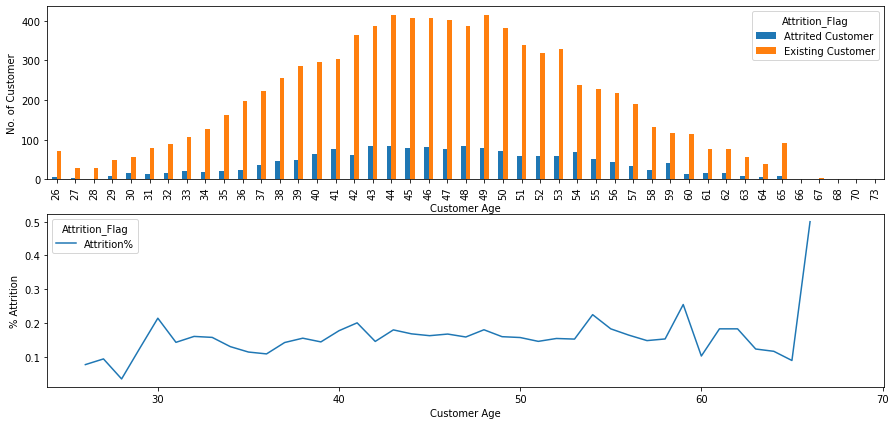

In [13]:
Customer_Age_Attrition = bankchurn.groupby(["Attrition_Flag"])["Customer_Age"].value_counts().unstack('Attrition_Flag')
Customer_Age_Attrition['Attrition%'] = Customer_Age_Attrition['Attrited Customer']/(Customer_Age_Attrition['Existing Customer'] + Customer_Age_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Customer_Age_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Customer Age", ylabel = "No. of Customer", ax=ax[0])
Customer_Age_Attrition[['Attrition%']].plot(kind='line', xlabel = "Customer Age", ylabel = "% Attrition", ax=ax[1])


Obervation 
- No visible trend

##### Gender

<AxesSubplot:xlabel='Gender', ylabel='% Attrition'>

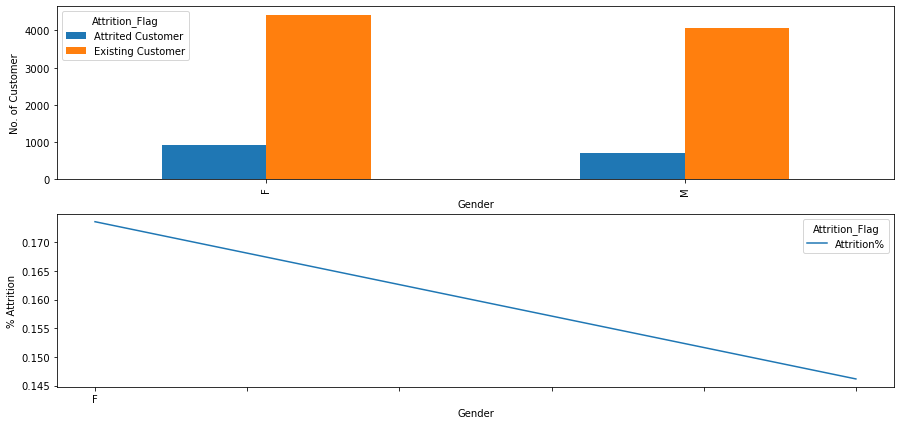

In [14]:
Gender_Attrition = bankchurn.groupby(["Attrition_Flag"])["Gender"].value_counts().unstack('Attrition_Flag')
Gender_Attrition['Attrition%'] = Gender_Attrition['Attrited Customer']/(Gender_Attrition['Existing Customer'] + Gender_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Gender_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Gender", ylabel = "No. of Customer", ax=ax[0])
Gender_Attrition[['Attrition%']].plot(kind='line', xlabel = "Gender", ylabel = "% Attrition", ax=ax[1])


Observation
- male seems to have a lower attrition rate

##### Dependent Count

<AxesSubplot:xlabel='Dependent count', ylabel='% Attrition'>

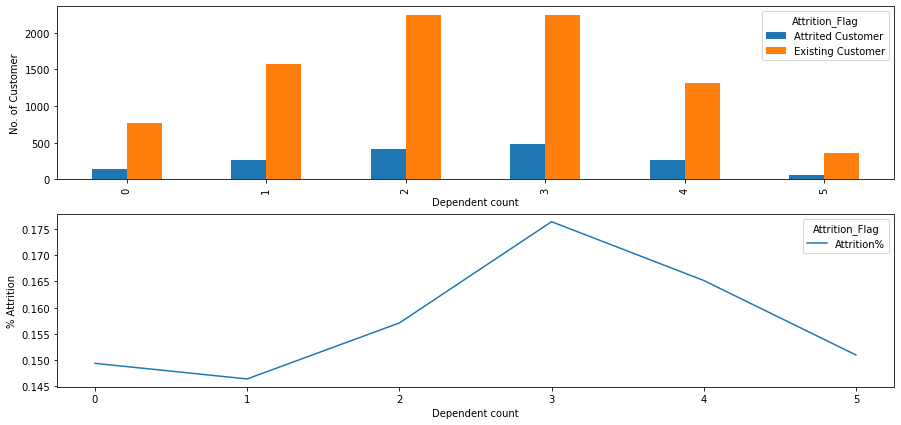

In [15]:
Dependent_count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Dependent_count"].value_counts().unstack('Attrition_Flag')
Dependent_count_Attrition['Attrition%'] = Dependent_count_Attrition['Attrited Customer']/(Dependent_count_Attrition['Existing Customer'] + Dependent_count_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Dependent_count_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Dependent count", ylabel = "No. of Customer", ax=ax[0])
Dependent_count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Dependent count", ylabel = "% Attrition", ax=ax[1])


Observation
- Customer with 3 dependents seems to have the highest attrition

##### Card Category

<AxesSubplot:xlabel='Card Category', ylabel='% Attrition'>

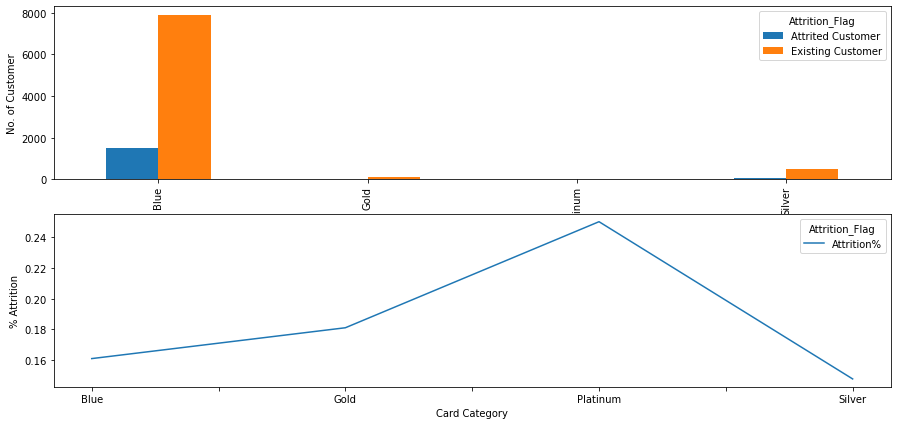

In [16]:
Card_Category_Attrition = bankchurn.groupby(["Attrition_Flag"])["Card_Category"].value_counts().unstack('Attrition_Flag')
Card_Category_Attrition['Attrition%'] = Card_Category_Attrition['Attrited Customer']/(Card_Category_Attrition['Existing Customer'] + Card_Category_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Card_Category_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Card Category", ylabel = "No. of Customer", ax=ax[0])
Card_Category_Attrition[['Attrition%']].plot(kind='line', xlabel = "Card Category", ylabel = "% Attrition", ax=ax[1])


In [17]:
Card_Category_Attrition

Attrition_Flag,Attrited Customer,Existing Customer,Attrition%
Card_Category,,,
Blue,1519,7917,0.160979
Gold,21,95,0.181034
Platinum,5,15,0.250000
Silver,82,473,0.147748


Observation
- Higher tier (Platinum) seems to have the highest attrition
- May be irrelevant as the is insufficient data

##### Months on Book (Period of relationship with bank)

<AxesSubplot:xlabel='Months on book', ylabel='% Attrition'>

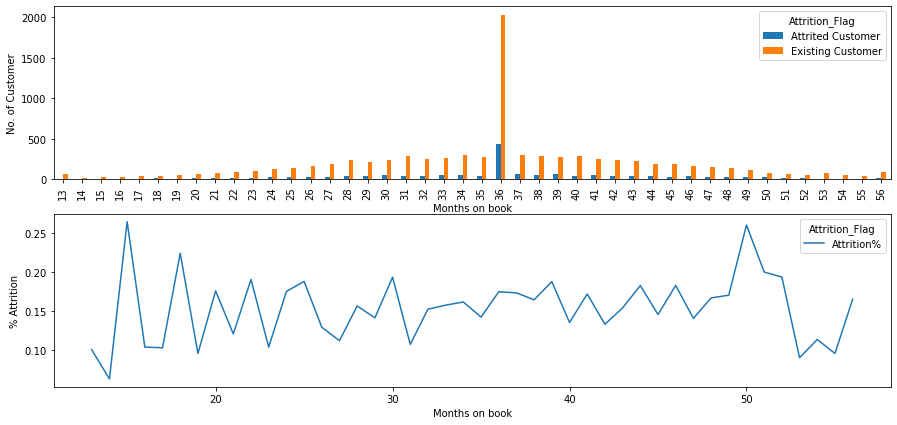

In [18]:
Months_on_book_Attrition = bankchurn.groupby(["Attrition_Flag"])["Months_on_book"].value_counts().unstack('Attrition_Flag')
Months_on_book_Attrition['Attrition%'] = Months_on_book_Attrition['Attrited Customer']/(Months_on_book_Attrition['Existing Customer'] + Months_on_book_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Months_on_book_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Months on book", ylabel = "No. of Customer", ax=ax[0])
Months_on_book_Attrition[['Attrition%']].plot(kind='line', xlabel = "Months on book", ylabel = "% Attrition", ax=ax[1])


Observation
- No well defined trend
- May be irrelevant data

##### Total relationship count (Total no. of products held by the customer with the bank)

<AxesSubplot:xlabel='Total Relationship Count', ylabel='% Attrition'>

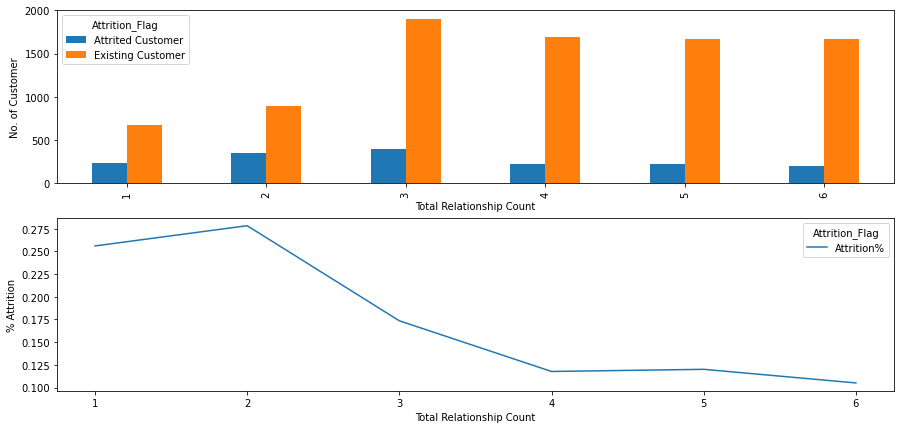

In [19]:
Total_Relationship_Count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Total_Relationship_Count"].value_counts().unstack('Attrition_Flag')
Total_Relationship_Count_Attrition['Attrition%'] = Total_Relationship_Count_Attrition['Attrited Customer']/(Total_Relationship_Count_Attrition['Existing Customer'] + Total_Relationship_Count_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Total_Relationship_Count_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Total Relationship Count", ylabel = "No. of Customer", ax=ax[0])
Total_Relationship_Count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Total Relationship Count", ylabel = "% Attrition", ax=ax[1])


Observation
- Attrition drops significantly with 3 or more products with the company

#### Months_Inactive_12_mon (No. of months inactive in the last 12 months)

<AxesSubplot:xlabel='Months Inactive 12_mo', ylabel='% Attrition'>

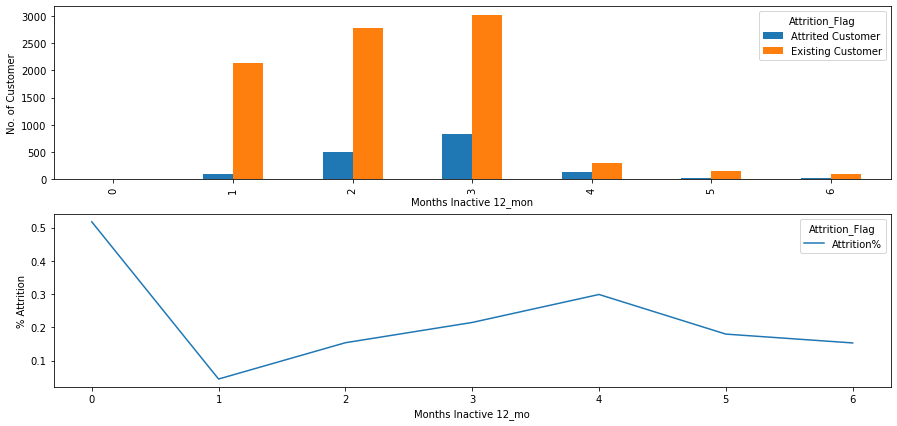

In [20]:
Months_Inactive_12_mon_Count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Months_Inactive_12_mon"].value_counts().unstack('Attrition_Flag')
Months_Inactive_12_mon_Count_Attrition['Attrition%'] = Months_Inactive_12_mon_Count_Attrition['Attrited Customer']/(Months_Inactive_12_mon_Count_Attrition['Existing Customer'] + Months_Inactive_12_mon_Count_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Months_Inactive_12_mon_Count_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Months Inactive 12_mon", ylabel = "No. of Customer", ax=ax[0])
Months_Inactive_12_mon_Count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Months Inactive 12_mo", ylabel = "% Attrition", ax=ax[1])


Observation
- Attrition rate gradually increase once they start to have inactivate month
- Attrition is the highest when they are inactive for 4 months. 
- Recommendation is to re-engage users if they recorded 1 month of inactivity and again on the 2nd month and 3rd month of inactivity

#### Contacts_Count_12_mon (No. of Contacts made in the last 12 months

<AxesSubplot:xlabel='Contacts Count 12_mon', ylabel='% Attrition'>

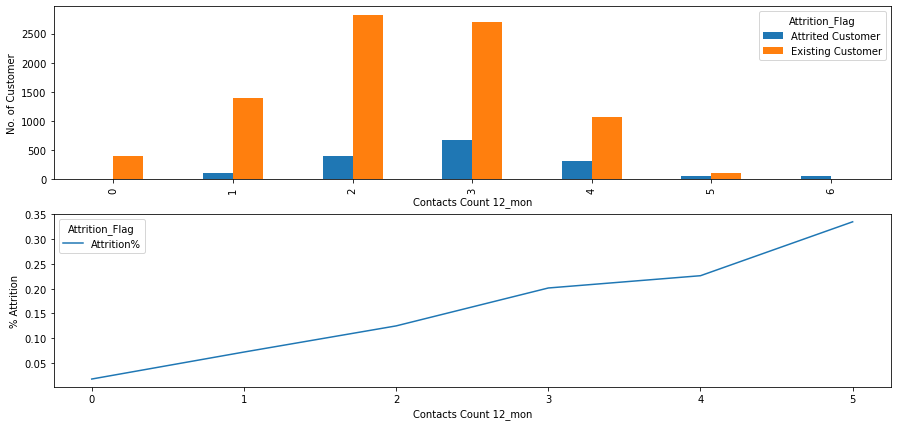

In [21]:
Contacts_Count_12_mon_Count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Contacts_Count_12_mon"].value_counts().unstack('Attrition_Flag')
Contacts_Count_12_mon_Count_Attrition['Attrition%'] = Contacts_Count_12_mon_Count_Attrition['Attrited Customer']/(Contacts_Count_12_mon_Count_Attrition['Existing Customer'] + Contacts_Count_12_mon_Count_Attrition['Attrited Customer'])

fig, ax = plot.subplots(nrows = 2, ncols = 1, figsize=(15,7))
Contacts_Count_12_mon_Count_Attrition[['Attrited Customer', 'Existing Customer']].plot(kind='bar', xlabel = "Contacts Count 12_mon", ylabel = "No. of Customer", ax=ax[0])
Contacts_Count_12_mon_Count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Contacts Count 12_mon", ylabel = "% Attrition", ax=ax[1])

Observation
- The most countacts they have with the bank, the more likely they are to churn
- This would signal unhappiness with the product and hence increased interaction
- Should investigate the interaction and understand the topic breakdown/concern raised during these contact

#### Credit_Limit (Credit Limit on the Credit Card)

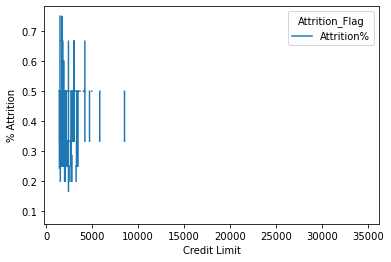

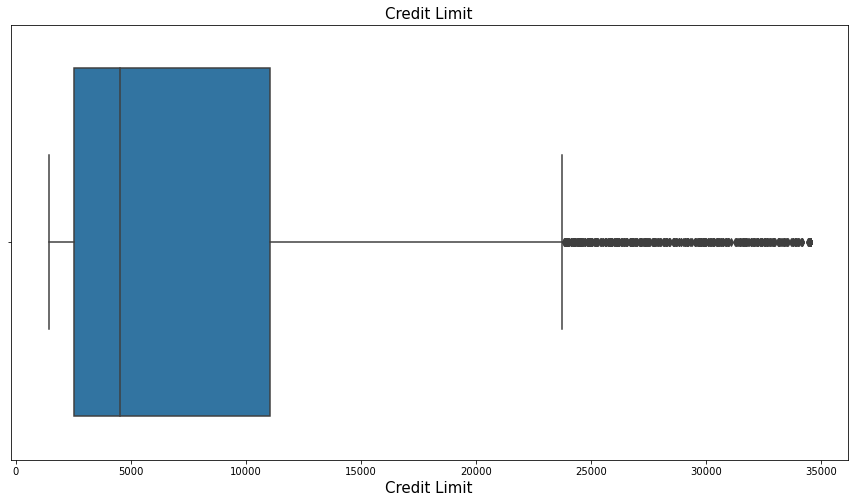

In [22]:
Credit_Limit_Count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Credit_Limit"].value_counts().unstack('Attrition_Flag')
Credit_Limit_Count_Attrition['Attrition%'] = Credit_Limit_Count_Attrition['Attrited Customer']/(Credit_Limit_Count_Attrition['Existing Customer'] + Credit_Limit_Count_Attrition['Attrited Customer'])

Credit_Limit_Count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Credit Limit", ylabel = "% Attrition")

plot.figure(figsize = (15,8))
sns.boxplot(x = bankchurn['Credit_Limit'])
plot.title('Credit Limit', fontsize = 15)
plot.xlabel('Credit Limit', fontsize = 15)
plot.show()


Observation
- Data too skewed for analysis

#### Total_Trans_Amt (Total Transaction Amount (Last 12 months))

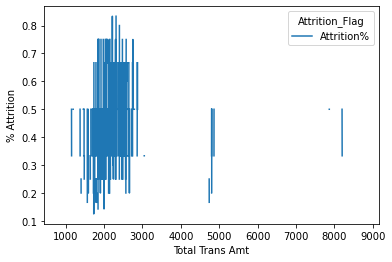

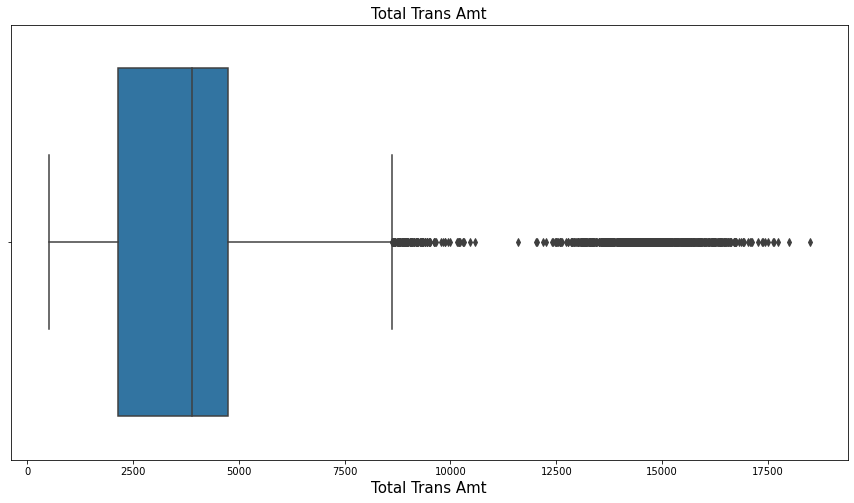

In [23]:
Total_Trans_Amt_Count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Total_Trans_Amt"].value_counts().unstack('Attrition_Flag')
Total_Trans_Amt_Count_Attrition['Attrition%'] = Total_Trans_Amt_Count_Attrition['Attrited Customer']/(Total_Trans_Amt_Count_Attrition['Existing Customer'] + Total_Trans_Amt_Count_Attrition['Attrited Customer'])

Total_Trans_Amt_Count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Total Trans Amt", ylabel = "% Attrition")

plot.figure(figsize = (15,8))
sns.boxplot(x = bankchurn['Total_Trans_Amt'])
plot.title('Total Trans Amt', fontsize = 15)
plot.xlabel('Total Trans Amt', fontsize = 15)
plot.show()

#### Observation
- Data too skewed for analysis

#### Total_Trans_Ct (Total Transaction Count (Last 12 months))

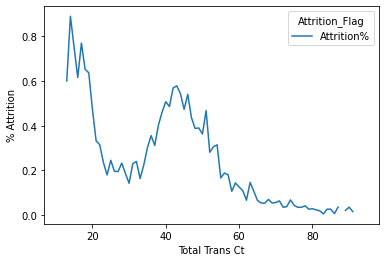

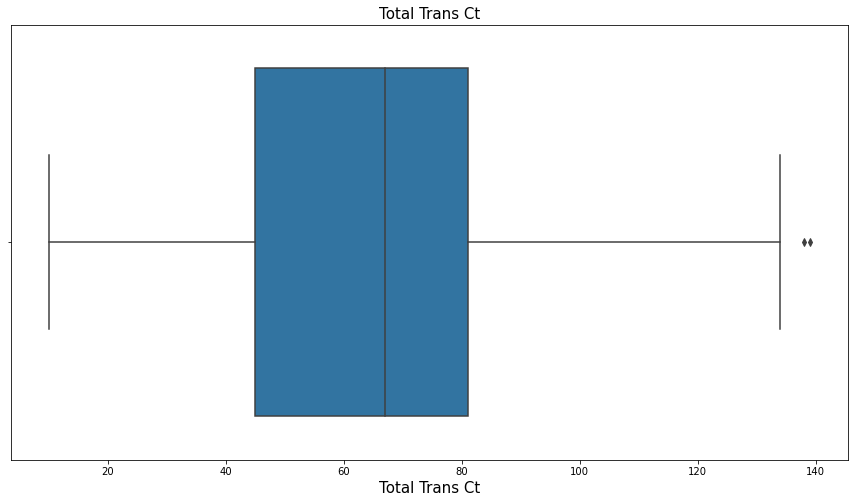

In [24]:
Total_Trans_Ct_Count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Total_Trans_Ct"].value_counts().unstack('Attrition_Flag')
Total_Trans_Ct_Count_Attrition['Attrition%'] = Total_Trans_Ct_Count_Attrition['Attrited Customer']/(Total_Trans_Ct_Count_Attrition['Existing Customer'] + Total_Trans_Ct_Count_Attrition['Attrited Customer'])

Total_Trans_Ct_Count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Total Trans Ct", ylabel = "% Attrition")

plot.figure(figsize = (15,8))
sns.boxplot(x = bankchurn['Total_Trans_Ct'])
plot.title('Total Trans Ct', fontsize = 15)
plot.xlabel('Total Trans Ct', fontsize = 15)
plot.show()

Observation
- Generally more clients who is more active is less likely to be attrited


#### Avg_Utilization_Ratio (Average Card Utilization Ratio)

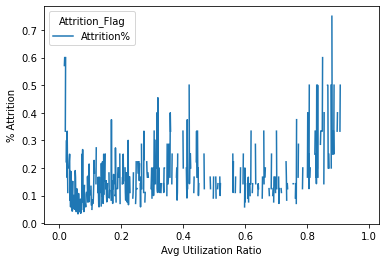

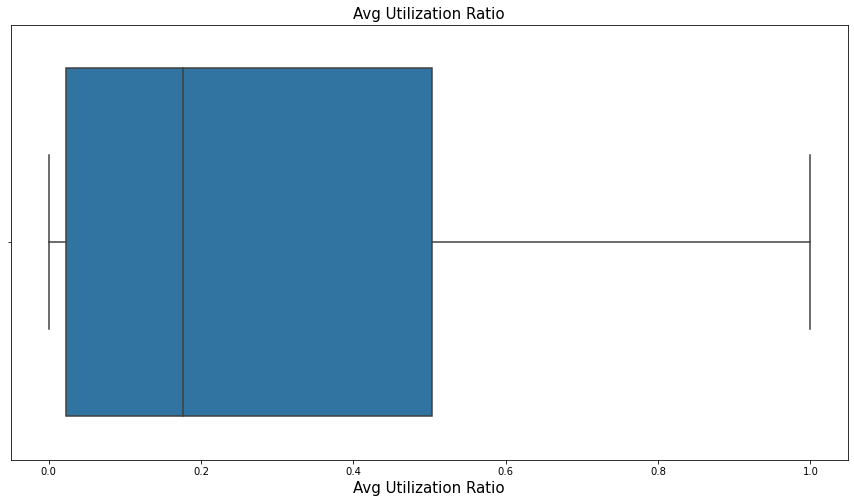

In [25]:
Avg_Utilization_Ratio_Count_Attrition = bankchurn.groupby(["Attrition_Flag"])["Avg_Utilization_Ratio"].value_counts().unstack('Attrition_Flag')
Avg_Utilization_Ratio_Count_Attrition['Attrition%'] = Avg_Utilization_Ratio_Count_Attrition['Attrited Customer']/(Avg_Utilization_Ratio_Count_Attrition['Existing Customer'] + Avg_Utilization_Ratio_Count_Attrition['Attrited Customer'])

Avg_Utilization_Ratio_Count_Attrition[['Attrition%']].plot(kind='line', xlabel = "Avg Utilization Ratio", ylabel = "% Attrition")

plot.figure(figsize = (15,8))
sns.boxplot(x = bankchurn['Avg_Utilization_Ratio'])
plot.title('Avg Utilization Ratio', fontsize = 15)
plot.xlabel('Avg Utilization Ratio', fontsize = 15)
plot.show()

Observation
- Data too skewed for analysis

### Doing a quick encoding for attrition flag to see if there is any potential correlation

In [26]:
a = [['Existing Customer', 'Attrited Customer']]
encoder = OrdinalEncoder(a)
bankchurn['Initial_encoded_Attrition_Flag'] = encoder.fit_transform(np.array(bankchurn.Attrition_Flag).reshape(-1,1))


/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass categories=[['Existing Customer', 'Attrited Customer']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


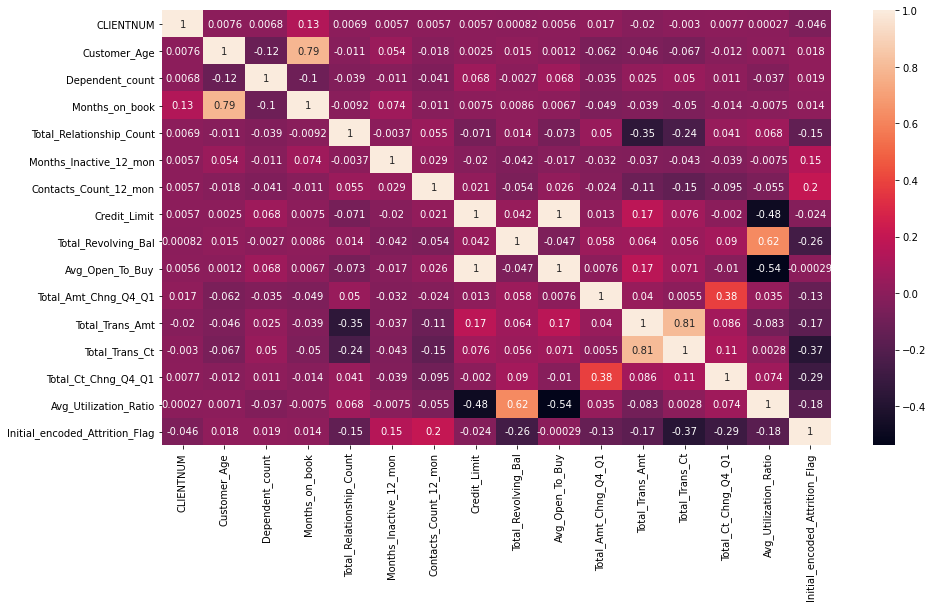

In [27]:
fig, ax = plot.subplots(figsize=(15,8))
corrMatrix = bankchurn.corr()
sns.heatmap(corrMatrix, annot=True)
plot.show()

### Data Encoding

- After exploring the data, I will be using 3 different type of encoding for different columns

| Frequency Encoding | Ordinal Encoding | Standard Scaler | 
| --- | --- | --- | 
| Gender | Attrition_Flag | Credit_Limit | 
| Dependent_count | Education_Level | Total_Revolving_Bal | 
| Marital_Status | Card_Category | Avg_Open_To_Buy | 
|  | Income_Category | Total_Amt_Chng_Q4_Q1 | 
|  |  | Total_Trans_Amt | 
|  |  | Total_Trans_Ct | 
|  |  | Total_Ct_Chng_Q4_Q1 | 
|  |  | Avg_Utilization_Ratio | 
|  |  | Customer_Age | 
|  |  | Months_on_book | 

In [28]:
counts = bankchurn.Gender.value_counts()
encoding = counts/len(bankchurn)
bankchurn['freq_encoded_gender'] = bankchurn.Gender.map(encoding)

counts = bankchurn.Dependent_count.value_counts()
encoding = counts/len(bankchurn)
bankchurn['freq_encoded_Dependent_count'] = bankchurn.Dependent_count.map(encoding)

counts = bankchurn.Marital_Status.value_counts()
encoding = counts/len(bankchurn)
bankchurn['freq_encoded_Marital_Status'] = bankchurn.Marital_Status.map(encoding)

y = [['Existing Customer', 'Attrited Customer']]
encoder = OrdinalEncoder(y)
bankchurn['ordinal_encoded_Attrition_Flag'] = encoder.fit_transform(np.array(bankchurn.Attrition_Flag).reshape(-1,1))

v = [['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']]
encoder = OrdinalEncoder(v)
bankchurn['ordinal_encoded_Education_Level'] = encoder.fit_transform(np.array(bankchurn.Education_Level).reshape(-1,1))

w = [['Blue', 'Silver', 'Gold', 'Platinum']]
encoder = OrdinalEncoder(w)
bankchurn['ordinal_encoded_Card_Category'] = encoder.fit_transform(np.array(bankchurn.Card_Category).reshape(-1,1))

x = [['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']]
encoder = OrdinalEncoder(x)
bankchurn['ordinal_encoded_Income_Category'] = encoder.fit_transform(np.array(bankchurn.Income_Category).reshape(-1,1))

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Customer_Age'] = standard_scale.fit_transform(bankchurn[['Customer_Age']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Credit_Limit'] = standard_scale.fit_transform(bankchurn[['Credit_Limit']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Total_Revolving_Bal'] = standard_scale.fit_transform(bankchurn[['Total_Revolving_Bal']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Avg_Open_To_Buy'] = standard_scale.fit_transform(bankchurn[['Avg_Open_To_Buy']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Total_Amt_Chng_Q4_Q1'] = standard_scale.fit_transform(bankchurn[['Total_Amt_Chng_Q4_Q1']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Total_Trans_Amt'] = standard_scale.fit_transform(bankchurn[['Total_Trans_Amt']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Total_Trans_Ct'] = standard_scale.fit_transform(bankchurn[['Total_Trans_Ct']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Total_Ct_Chng_Q4_Q1'] = standard_scale.fit_transform(bankchurn[['Total_Ct_Chng_Q4_Q1']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Avg_Utilization_Ratio'] = standard_scale.fit_transform(bankchurn[['Avg_Utilization_Ratio']])

standard_scale = StandardScaler()
bankchurn['standardscale_encoded_Months_on_book'] = standard_scale.fit_transform(bankchurn[['Months_on_book']])

bankchurn.head()


/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass categories=[['Existing Customer', 'Attrited Customer']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass categories=[['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass categories=[['Blue', 'Silver', 'Gold', 'Platinum']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,standardscale_encoded_Customer_Age,standardscale_encoded_Credit_Limit,standardscale_encoded_Total_Revolving_Bal,standardscale_encoded_Avg_Open_To_Buy,standardscale_encoded_Total_Amt_Chng_Q4_Q1,standardscale_encoded_Total_Trans_Amt,standardscale_encoded_Total_Trans_Ct,standardscale_encoded_Total_Ct_Chng_Q4_Q1,standardscale_encoded_Avg_Utilization_Ratio,standardscale_encoded_Months_on_book
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,-0.165406,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.384621
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.333570,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,1.010715
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.583058,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0.008965
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,-0.789126,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.241473
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,-0.789126,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-1.869317


### Quick check on the data

In [29]:
bankchurn.ordinal_encoded_Income_Category.value_counts()

1.0    3561
2.0    1790
4.0    1535
3.0    1402
0.0    1112
5.0     727
Name: ordinal_encoded_Income_Category, dtype: int64

In [30]:
print (bankchurn['standardscale_encoded_Credit_Limit'].min())
print (bankchurn['standardscale_encoded_Credit_Limit'].max())

-0.7915266457961451
2.848053744180521


### Creating a new database to be fitted into the machine learning models

In [31]:
bankchurn_ML_old = bankchurn[['ordinal_encoded_Attrition_Flag', 'Customer_Age', 'freq_encoded_gender', 
                          'freq_encoded_Dependent_count','ordinal_encoded_Education_Level', 'freq_encoded_Marital_Status', 
                          'ordinal_encoded_Income_Category','ordinal_encoded_Card_Category', 'Months_on_book',
                          'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'standardscale_encoded_Credit_Limit',
                         'standardscale_encoded_Total_Revolving_Bal', 'standardscale_encoded_Avg_Open_To_Buy', 
                         'standardscale_encoded_Total_Amt_Chng_Q4_Q1', 'standardscale_encoded_Total_Trans_Amt',
                         'standardscale_encoded_Total_Trans_Ct', 'standardscale_encoded_Total_Ct_Chng_Q4_Q1',
                         'standardscale_encoded_Avg_Utilization_Ratio', 'Total_Relationship_Count']]
bankchurn_ML_old.describe()

,ordinal_encoded_Attrition_Flag,Customer_Age,freq_encoded_gender,freq_encoded_Dependent_count,ordinal_encoded_Education_Level,freq_encoded_Marital_Status,ordinal_encoded_Income_Category,ordinal_encoded_Card_Category,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,standardscale_encoded_Credit_Limit,standardscale_encoded_Total_Revolving_Bal,standardscale_encoded_Avg_Open_To_Buy,standardscale_encoded_Total_Amt_Chng_Q4_Q1,standardscale_encoded_Total_Trans_Amt,standardscale_encoded_Total_Trans_Ct,standardscale_encoded_Total_Ct_Chng_Q4_Q1,standardscale_encoded_Avg_Utilization_Ratio,Total_Relationship_Count
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000
mean,0.160660,46.325960,0.501691,0.208330,2.601955,0.376728,2.085711,0.083638,35.928409,2.341167,2.455317,9.430893e-16,-1.830898e-15,-4.386159e-17,2.801869e-16,-5.134192e-16,1.194179e-14,-1.306570e-16,-2.298338e-16,3.812580
std,0.367235,8.016814,0.029033,0.069067,1.700417,0.130573,1.474639,0.333784,7.986416,1.010622,1.106225,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.554408
min,0.000000,26.000000,0.470919,0.041868,0.000000,0.073862,0.000000,0.000000,13.000000,0.000000,0.000000,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01,1.000000
25%,0.000000,41.000000,0.470919,0.155426,1.000000,0.389355,1.000000,0.000000,31.000000,2.000000,2.000000,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01,3.000000
50%,0.000000,46.000000,0.529081,0.262170,3.000000,0.389355,2.000000,0.000000,36.000000,2.000000,2.000000,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01,4.000000
75%,0.000000,52.000000,0.529081,0.269774,4.000000,0.462822,3.000000,0.000000,40.000000,3.000000,3.000000,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01,5.000000
max,1.000000,73.000000,0.529081,0.269774,6.000000,0.462822,5.000000,3.000000,56.000000,6.000000,6.000000,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00,6.000000


In [32]:
bankchurn_ML_old_overview = pd.DataFrame(bankchurn_ML_old.dtypes, columns = ["data_type"])
bankchurn_ML_old_overview["count"] = bankchurn_ML_old.count()
bankchurn_ML_old_overview["null_value"] = bankchurn_ML_old.isnull().sum()
bankchurn_ML_old_overview["min"] = bankchurn_ML_old.min()
bankchurn_ML_old_overview["max"] = bankchurn_ML_old.max()
bankchurn_ML_old_overview

,data_type,count,null_value,min,max
ordinal_encoded_Attrition_Flag,float64,10127,0,0.000000,1.000000
Customer_Age,int64,10127,0,26.000000,73.000000
freq_encoded_gender,float64,10127,0,0.470919,0.529081
freq_encoded_Dependent_count,float64,10127,0,0.041868,0.269774
ordinal_encoded_Education_Level,float64,10127,0,0.000000,6.000000
freq_encoded_Marital_Status,float64,10127,0,0.073862,0.462822
ordinal_encoded_Income_Category,float64,10127,0,0.000000,5.000000
ordinal_encoded_Card_Category,float64,10127,0,0.000000,3.000000
Months_on_book,int64,10127,0,13.000000,56.000000
Months_Inactive_12_mon,int64,10127,0,0.000000,6.000000


### Observations 

- Customer age range is still too wide (26-73), will use standard scaler to normalise it 
- Months on book is too wide (13-56), will use standard scaler to normalise it 
- There is outliers for standardscale_encoded_Total_Amt_Chng_Q4_Q1, need to check if we should remove the outliers as it is very far out (Removed from dataset as the range is wide and prove to be a distraction, lagging indicator as it takes 6 months to get the result which render it very inefficient)
- There is outliers for standardscale_encoded_Total_Ct_Chng_Q4_Q1, need to check if we should remove the outliers as it is very far out (Removed from dataset as the range is wide and prove to be a distraction, lagging indicator as it takes 6 months to get the result which render it very inefficient)

All the observations have been updated at the table below

### Updating and final database to be fitted into the machine learning models

In [33]:
bankchurn_ML = bankchurn[['ordinal_encoded_Attrition_Flag', 'standardscale_encoded_Customer_Age', 'freq_encoded_gender', 
                          'freq_encoded_Dependent_count','ordinal_encoded_Education_Level', 'freq_encoded_Marital_Status', 
                          'ordinal_encoded_Income_Category','ordinal_encoded_Card_Category', 'standardscale_encoded_Months_on_book',
                          'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'standardscale_encoded_Credit_Limit',
                         'standardscale_encoded_Total_Revolving_Bal', 'standardscale_encoded_Avg_Open_To_Buy', 
                         'standardscale_encoded_Total_Trans_Amt', 'standardscale_encoded_Total_Trans_Ct',
                         'standardscale_encoded_Avg_Utilization_Ratio', 'Total_Relationship_Count']]
bankchurn_ML

,ordinal_encoded_Attrition_Flag,standardscale_encoded_Customer_Age,freq_encoded_gender,freq_encoded_Dependent_count,ordinal_encoded_Education_Level,freq_encoded_Marital_Status,ordinal_encoded_Income_Category,ordinal_encoded_Card_Category,standardscale_encoded_Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,standardscale_encoded_Credit_Limit,standardscale_encoded_Total_Revolving_Bal,standardscale_encoded_Avg_Open_To_Buy,standardscale_encoded_Total_Trans_Amt,standardscale_encoded_Total_Trans_Ct,standardscale_encoded_Avg_Utilization_Ratio,Total_Relationship_Count
0,0.0,-0.165406,0.470919,0.269774,2.0,0.462822,3.0,0.0,0.384621,1,3,0.446622,-0.473422,0.488971,-0.959707,-0.973895,-0.775882,5
1,0.0,0.333570,0.529081,0.041868,4.0,0.389355,1.0,0.0,1.010715,1,2,-0.041367,-0.366667,-0.008486,-0.916433,-1.357340,-0.616276,6
2,0.0,0.583058,0.470919,0.269774,4.0,0.462822,4.0,0.0,0.008965,1,0,-0.573698,-1.426858,-0.445658,-0.740982,-1.911206,-0.997155,4
3,0.0,-0.789126,0.529081,0.155426,2.0,0.073961,1.0,0.0,-0.241473,4,1,-0.585251,1.661686,-0.734100,-0.951758,-1.911206,1.759686,3
4,0.0,-0.789126,0.470919,0.269774,1.0,0.462822,3.0,0.0,-1.869317,1,0,-0.430877,-1.426858,-0.302868,-1.056263,-1.570365,-0.997155,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.458314,0.470919,0.262170,4.0,0.389355,2.0,0.0,0.509840,2,3,-0.509330,0.844455,-0.584929,3.259358,2.221481,0.678714,3
10123,1.0,-0.664382,0.470919,0.262170,0.0,0.073862,2.0,0.0,-1.368442,2,3,-0.479181,1.255524,-0.591639,1.283475,0.176440,0.856458,4
10124,1.0,-0.290150,0.529081,0.181495,2.0,0.462822,1.0,0.0,0.008965,3,4,-0.354626,-1.426858,-0.226632,1.732994,-0.207005,-0.997155,5
10125,1.0,-2.036565,0.470919,0.262170,4.0,0.073961,2.0,0.0,0.008965,3,3,-0.368710,-1.426858,-0.240713,1.174848,-0.121795,-0.997155,4


### Double checking the tables, the attributes and the values

In [34]:
bankchurn_ML_overview = pd.DataFrame(bankchurn_ML.dtypes, columns = ["data_type"])
bankchurn_ML_overview["count"] = bankchurn_ML.count()
bankchurn_ML_overview["null_value"] = bankchurn_ML.isnull().sum()
bankchurn_ML_overview["min"] = bankchurn_ML.min()
bankchurn_ML_overview["max"] = bankchurn_ML.max()
bankchurn_ML_overview

,data_type,count,null_value,min,max
ordinal_encoded_Attrition_Flag,float64,10127,0,0.000000,1.000000
standardscale_encoded_Customer_Age,float64,10127,0,-2.535541,3.327426
freq_encoded_gender,float64,10127,0,0.470919,0.529081
freq_encoded_Dependent_count,float64,10127,0,0.041868,0.269774
ordinal_encoded_Education_Level,float64,10127,0,0.000000,6.000000
freq_encoded_Marital_Status,float64,10127,0,0.073862,0.462822
ordinal_encoded_Income_Category,float64,10127,0,0.000000,5.000000
ordinal_encoded_Card_Category,float64,10127,0,0.000000,3.000000
standardscale_encoded_Months_on_book,float64,10127,0,-2.871068,2.513340
Months_Inactive_12_mon,int64,10127,0,0.000000,6.000000


### Quick Machine Learning testing

In [35]:
feature_columns = ['standardscale_encoded_Customer_Age', 'freq_encoded_gender', 
                          'freq_encoded_Dependent_count','ordinal_encoded_Education_Level', 'freq_encoded_Marital_Status', 
                          'ordinal_encoded_Income_Category','ordinal_encoded_Card_Category', 'standardscale_encoded_Months_on_book',
                          'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'standardscale_encoded_Credit_Limit',
                         'standardscale_encoded_Total_Revolving_Bal', 'standardscale_encoded_Avg_Open_To_Buy', 
                         'standardscale_encoded_Total_Trans_Amt', 'standardscale_encoded_Total_Trans_Ct',
                         'standardscale_encoded_Avg_Utilization_Ratio', 'Total_Relationship_Count']

X = bankchurn_ML[feature_columns]
y = bankchurn_ML['ordinal_encoded_Attrition_Flag']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Trying baseline model
- KNN (K nearest neighbour)
- RF (Random foreest)
- LR (Logistic regression)
- SVM (Support vector machine)
- Gradient Boosting
- Adaboost

In [112]:
test_df = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score'])

test_model = {'KNN':KNeighborsClassifier(), 'RF':RandomForestClassifier(), 'LR':LogisticRegression(), 
              'SVC':SVC(), 'GB':GradientBoostingClassifier(), 'Adaboost':AdaBoostClassifier()}

counter = 0
for k, model in test_model.items():
    base_model = model.fit(X_train, y_train)
    model_result = base_model.predict(X_test)
    test_df.loc[counter, :] = k, roc_auc_score(y_test , model_result), log_loss(y_test, model_result), \
                            accuracy_score(y_test,model_result), precision_score(y_test,model_result), \
                            recall_score(y_test,model_result), f1_score(y_test,model_result)
    counter += 1

print (test_df)


/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


      model       roc   logloss  accuracy precision    recall  f1_score
0       KNN  0.739806  3.614148   0.89536  0.757991  0.510769  0.610294
1        RF  0.872945  1.738882  0.949654  0.911439      0.76  0.828859
2        LR  0.727792  3.733482  0.891905  0.752381  0.486154  0.590654
3       SVC  0.749349  3.204992  0.907206  0.844221  0.516923  0.641221
4        GB  0.868261  1.721832  0.950148  0.927481  0.747692  0.827939
5  Adaboost  0.858061   2.09689  0.939289  0.863309  0.738462   0.79602


#### Observation from baseline model testing
- Random forest and gradient boosting model seems to be the best performing
- Adaboost model seems to be the 3rd best model
- Proceed to hyperparameter tuning for Random Forect, Gradient boosting and Adaboost model

### Random Forest - Hyperparameter tuning

In [49]:
base_model_rf = RandomForestClassifier(random_state=42, class_weight = {0: 1, 1: 5.2})


In [50]:
param_dict_rf = {'n_estimators' : [ 150, 160, 170, 180, 190] , 
                 'max_depth' : [12, 13, 14, 15, 16]}

- Tried n_estimators : 
>- 10, 20, 50, 100 return 100 as best
>- 80, 100, 200 return 100 as best
>- 80, 100, 120, 140, 160 return 160 as best
>- 150, 160, 170, 180, 190 return 170 as best


- Tried max_depht : 
>- 5, 6, 7, 8, 9 return 9 as best
>- 7, 9, 11, 13, 15 return 15 as best
>- 14, 15, 16, 17, 18 return 14 as best

- Adjusted multiple times so that the best parameter is not the extreme numbers
- Best matrix at {'max_depth': 14, 'n_estimators': 170}, using {'n_estimators' : [ 150, 160, 170, 180, 190] , 'max_depth' : [12, 13, 14, 15, 16]}

In [51]:
grid_model_rf = GridSearchCV(param_grid= param_dict_rf , 
                             estimator= base_model_rf , cv= 5 , verbose=1)

In [52]:
grid_model_rf.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 5.2},
                                              random_state=42),
             param_grid={'max_depth': [12, 13, 14, 15, 16],
                         'n_estimators': [150, 160, 170, 180, 190]},
             verbose=1)

In [70]:
grid_model_rf.best_params_

{'max_depth': 14, 'n_estimators': 170}

### Gradient Boosting - Hyperparameter tuning

In [93]:
base_model_gb = GradientBoostingClassifier(random_state=42)

In [106]:
param_dict_gb = {'n_estimators' : [ 190, 200, 210, 220, 230],
                 'max_depth' : [3, 4, 5, 6, 7], 
                  'learning_rate' : [0.06, 0.07, 0.08, 0.09, 0.1], 
                  'max_features' :['sqrt', 'auto', 'log2']} 


- Tried n_estimators : 
>- 50, 150, 250 return 150 as best
>- 100, 150, 200 return 200 as best


- Tried max_depht : 
>- 5, 15 , 25 return 5 as best
>- 3, 5, 10 return 5 as best


- learning_rate
>- 0.01, 0.1, 0.4 return 0.1 as best
>- 0.08, 0.1, 0.2 return 0.08 as best


- max_features
>- 'sqrt', 'auto', 'log2' return 'auto' as best
>- 'sqrt', 'auto', 'log2' return 'sqrt' as best


- First try with 405 fits took 1hour 2 mins
- Changing strategy to have more parameter and let it run overnight
>- [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
>- [Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 61.8min finished

- Best matrix at {'learning_rate': 0.08,'max_depth': 5,'max_features': 'sqrt','n_estimators': 210}, using {'n_estimators' : [ 190, 200, 210, 220, 230],'max_depth' : [3, 4, 5, 6, 7], 'learning_rate' : [0.06, 0.07, 0.08, 0.09, 0.1], 'max_features' :['sqrt', 'auto', 'log2']} 

In [101]:
grid_model_gb = GridSearchCV(param_grid= param_dict_gb , 
                             estimator= base_model_gb , cv= 5 , verbose=1)

In [102]:
grid_model_gb.fit(X_train , y_train)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1875 out of 1875 | elapsed: 123.8min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.06, 0.07, 0.08, 0.09, 0.1],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [180, 190, 200, 210, 220]},
             verbose=1)

In [103]:
grid_model_gb.best_params_

{'learning_rate': 0.08,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 210}

### Adaboost - Hyperparameter tuning

In [87]:
base_model_ab = AdaBoostClassifier(random_state=42)

In [88]:
param_dict_ab = {'n_estimators' : [ 380, 390, 400, 410, 420] ,  
                 'learning_rate' : [0.26, 0.27, 0.28, 0.29, 0.30]}

- Tried n_estimators : 
>- 100, 120, 140, 160, 180 return 180 as best
>- 160, 180, 200, 220, 240 return 240 as best
>- 230, 250, 270, 290, 310 return 310 as best
>- 310, 340, 370, 400, 430 return 400 as best


- Tried learning_rate : 
>- 0.005, 0.01, 0.05, 0.1 , 0.2 return 0.2 as best
>- 0.1, 0.2, 0.3, 0.4 , 0.5 return 0.3 as best
>- 0.26, 0.28, 0.3, 0.32, 0.34 return 0.28 as best



- Adjusted multiple times so that the best parameter is not the extreme numbers
- Best matrix at {'learning_rate': 0.28, 'n_estimators': 400}, using {'n_estimators' : [ 380, 390, 400, 410, 420] , 'learning_rate' : [0.26, 0.27, 0.28, 0.29, 0.30]}

In [89]:
grid_model_ab = GridSearchCV(param_grid= param_dict_ab , 
                             estimator= base_model_ab , cv= 5 , verbose=1)

In [90]:
grid_model_ab.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  8.8min finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.26, 0.27, 0.28, 0.29, 0.3],
                         'n_estimators': [380, 390, 400, 410, 420]},
             verbose=1)

In [91]:
grid_model_ab.best_params_

{'learning_rate': 0.28, 'n_estimators': 400}

## Comparing 3 models with best tuned

In [71]:
best_tuned_3_models_overview = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score'])

best_tuned_3_model = {'RF':RandomForestClassifier(max_depth = 14, n_estimators = 170, criterion = 'entropy', random_state = 42, class_weight = {0: 1, 1: 5.2}), 
                      'GB':GradientBoostingClassifier(n_estimators = 210, max_depth = 5, learning_rate = 0.08, max_features = 'sqrt', random_state = 42), 
                      'Adaboost':AdaBoostClassifier(n_estimators = 400, learning_rate = 0.28, random_state = 42)}

best_model_counter = 0
for k, model in best_tuned_3_model.items():
    best_model = model.fit(X_train, y_train)
    best_result = best_model.predict(X_test)
    best_tuned_3_models_overview.loc[best_model_counter, :] = k, roc_auc_score(y_test , best_result), log_loss(y_test, best_result), accuracy_score(y_test,best_result), precision_score(y_test,best_result), recall_score(y_test,best_result), f1_score(y_test,best_result)
    best_model_counter += 1

print (best_tuned_3_models_overview)

      model       roc   logloss  accuracy precision    recall  f1_score
0        RF  0.879462  1.721836  0.950148       0.9  0.775385  0.833058
1        GB  0.880932  1.636595  0.952616  0.916364  0.775385      0.84
2  Adaboost  0.874327  1.875268  0.945706  0.877193  0.769231  0.819672


In [72]:
final_best_model = RandomForestClassifier(max_depth = 14, n_estimators = 170, criterion = 'entropy', random_state = 42, class_weight = {0: 1, 1: 5.2})
final_best_model

RandomForestClassifier(class_weight={0: 1, 1: 5.2}, criterion='entropy',
                       max_depth=14, n_estimators=170, random_state=42)

### Model Selection

I select RandomForest model because the dataset that I am working on is unbalanced dataset (84% - 16%). Unlike other models, RandomForest have a weight adjustable parameter so that I can balance the model accordingly (remove biasness). 

The model is also very accurate with Logloss 1.722, ROC-AUC score at 0.879, accuracy at 0.95, precision at 0.91, recall at 0.775 and F1 score at 0.833


### Visualisation

#### Confusion Matrix

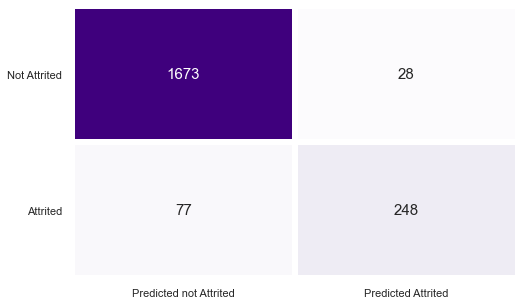

In [77]:
y_predict = grid_model_rf.predict(X_test)

plot.figure(figsize = (8, 5))
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, cmap = "Purples", annot = True, fmt = "d", linewidths = 5, cbar = False, annot_kws = {"fontsize": 15},
           yticklabels = ["Not Attrited", "Attrited"], xticklabels = ["Predicted not Attrited", "Predicted Attrited"])
plot.yticks(rotation = 0)
plot.show()


#### Roc Curve

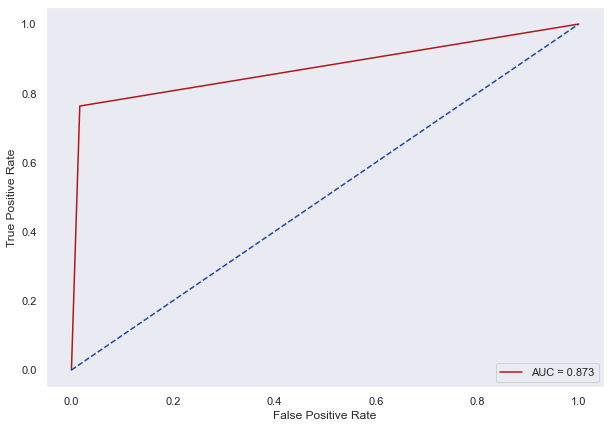

In [78]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = "dark")
plot.figure(figsize = (10, 7))
plot.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plot.axis('tight')
plot.ylabel("True Positive Rate")
plot.xlabel("False Positive Rate")
plot.show()


#### Feature Importance

In [79]:
feat_imp_rf = pd.DataFrame(columns = ['feature', 'importance'], index = range(17))
for a in range(len(feat_imp_rf.index)):
    feat_imp_rf.iloc[a,0] = X_train.columns.to_list()[a]
feat_imp_rf['importance'] = grid_model_rf.best_estimator_.feature_importances_
feat_imp_rf = feat_imp_rf.sort_values('importance', ascending = False)
feat_imp_rf[0:17].style.background_gradient(cmap = 'Purples')

,feature,importance
14,standardscale_encoded_Total_Trans_Ct,0.254228
13,standardscale_encoded_Total_Trans_Amt,0.243685
11,standardscale_encoded_Total_Revolving_Bal,0.125924
15,standardscale_encoded_Avg_Utilization_Ratio,0.066689
16,Total_Relationship_Count,0.058422
8,Months_Inactive_12_mon,0.039159
12,standardscale_encoded_Avg_Open_To_Buy,0.036451
10,standardscale_encoded_Credit_Limit,0.034069
0,standardscale_encoded_Customer_Age,0.034012
9,Contacts_Count_12_mon,0.029636
